#  **<<< Only Problem 1, 4 and 9 will be graded >>>**

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

## Problem 1
Sketch the following signals


1.$x(t) = \sin \left (\frac{\pi}{4}t + 20^\circ \right)$


2.$x(t) = \begin{cases}t+2 , t \leq -2 \\ 0 , -2 \leq t \leq 2\\ t-2 , t \geq 2 \end{cases}$

3.$x(t) = 2e^{-t}, 0 \leq t < 1$ and $ x(t+1) = x(t) $ for all $t$

4.$x(t) = u(t) + 5u(t-1) -2u(t-2)$

5.$x(t) = r(t) - r(t-1) - u(t-2)$




In [32]:
def u(t):
  if(t>0):
    return 1
  else:
    return 0
  
def r(t):
  return max(t,0)

def x1(t):
  return np.sin(np.pi*t/4+np.pi/9)

def x2(t):
  if(t<=-2):
    return t+2
  elif(-2<=t<=2):
    return 0
  else:
    return t-2
  
def x3(t):
  return 2*np.e**(-(t%1))
  
def x4(t):
  return u(t)+5*u(t-1)-2*u(t-2)

def x5(t):
  return r(t)-r(t-1)-u(t-2)

1


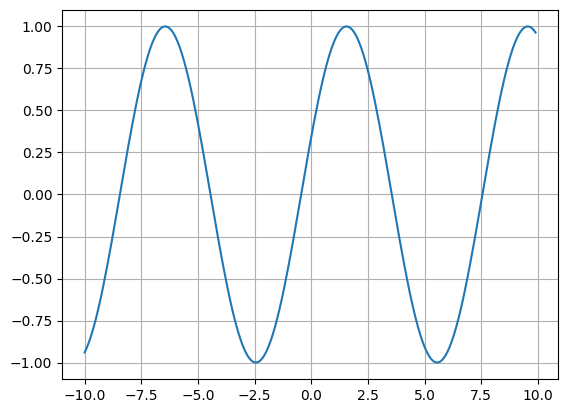

2


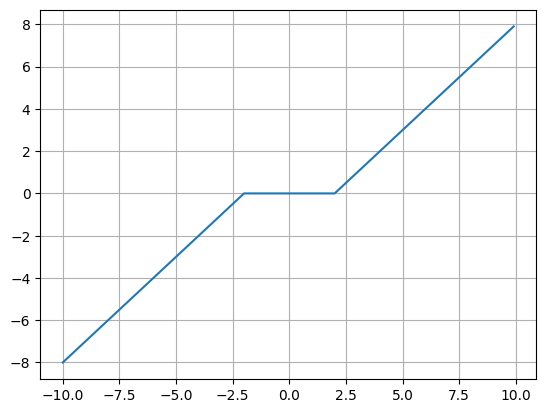

3


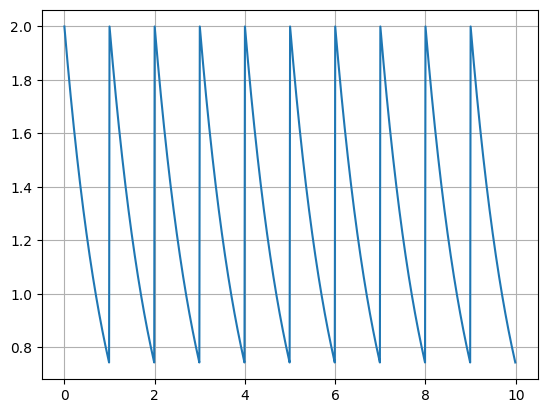

4


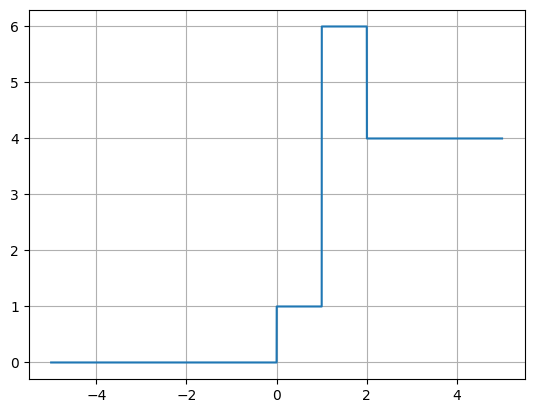

5


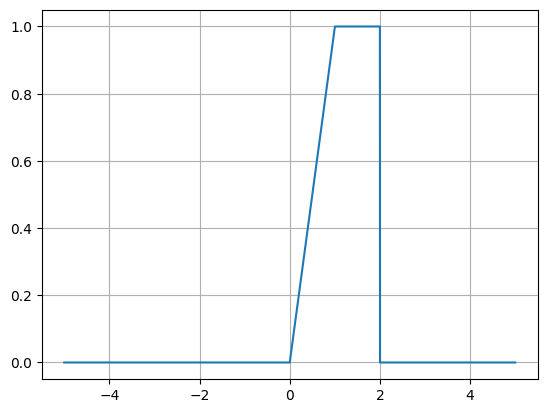

In [33]:
print(1)
x=np.arange(-10,10,0.1)
y1=x1(x)
plt.plot(x,y1,"-")
plt.grid(True)
plt.show()

print(2)
x=np.arange(-10,10,0.1)
y2=[]
for i in x:
    y2.append(x2(i))
plt.plot(x,y2,"-")
plt.grid(True)
plt.show()

print(3)
x=np.arange(0,10,0.01)
y3=x3(x)
plt.plot(x,y3,"-")
plt.grid(True)
plt.show()

print(4)
x=np.arange(-5,5,0.0001)
y4=[]
for i in x:
    y4.append(x4(i))
plt.plot(x,y4,"-")
plt.grid(True)
plt.show()

print(5)
x=np.arange(-5,5,0.001)
y5=[]
for i in x:
    y5.append(x5(i))
plt.plot(x,y5,"-")
plt.grid(True)
plt.show()

## Problem 2
Determine whether each of following signals is periodic, and if so, find its period.

1.$x(t) = \sin \left( \frac{\pi}{3}t \right) + \cos \left( \frac{8\pi}{3}t \right)$

2.$x(t) = \exp \left  (j\frac{7\pi}{6}t \right) +  \exp \left( j\frac{5\pi}{6}t \right) $

3.$x(t) = \exp \left( j\frac{7\pi}{6}t \right) +  \exp \left(\frac{5\pi}{6}t \right) $


Ans

1.periodic with T=6

2.periodic with T=12

3.aperiodic

## Problem 3 (ยังไม่ได้ทำ)
Determine whether the following signals are power or energy signals or neither. Justify your answers

1. $x(t) = A\sin( t ), -\infty < t < \infty$
2. $x(t) = A(u(t-a) - u(t+a)), \, a>0 $
4. $x(t) = \exp(-at)u(t), \,  a>0 $
7. $x(t) = A\exp(bt)u(t), \, b>0$



## Problem 4
For the discrete time signal x[n] shown in Figure below, sketch each of the following

1. $x[2-n] $
2. $x[3n-4] $
3. $x\left[ \frac{2}{3}n+1 \right]  $
4. $x\left[-\frac{n+8}{4} \right] $
5. $x[n^3] $
8. $x[2-n] +x[3n-4] $

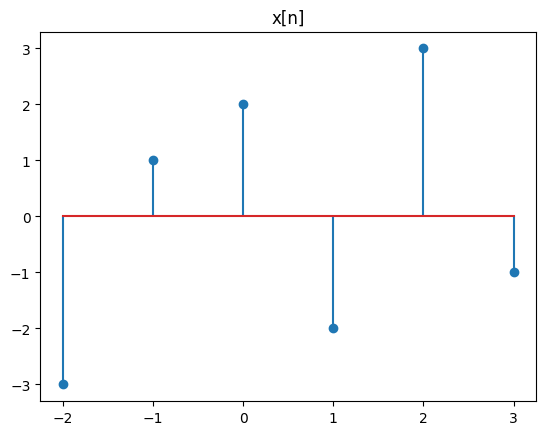

In [34]:
# x[n]
t = np.arange(-2,4)
x_t = np.array([-3,1,2,-2,3,-1])
plt.stem(t, x_t)
plt.title('x[n]')
plt.show()

In [35]:
def x1(t,x):
    rt=np.flip(t)
    rt*=-1
    rt=rt+2
    rx=np.flip(x)
    return rt,rx

def x2(t,x):
    rt=t+4
    rt=rt/3
    return rt,x

def x3(t,x):
    rt=t-1
    rt*=3
    rt=rt/2
    return rt,x

def x4(t,x):
    rt=t+2
    rt=np.flip(rt)
    rx=np.flip(x)
    rt*=-1
    rt*=4
    return rt,rx

def x5(t,x):
    rt=np.cbrt(t)
    return rt,x

def x6(t,x):
    rt,rx=x1(t,x)
    t_2,x_2=x2(-t,x)
    for i in range(len(t_2)):
        idxs=np.where(rt == t_2[i])
        if(len(idxs[0])==0):
            rt=np.append(rt,np.array([t_2[i]]))
            rx=np.append(rx,np.array([x_2[i]]))
        else:
            rx[idxs[0][0]]+=x_2[i]
    return rt,rx


In [36]:
def filterInt(t,x):
    idx = [(i%1==0) for i in t]
    return t[idx],x[idx]

def display(t,x,i):
    print(i)
    print(t,x)
    plt.stem(t, x)
    plt.show()

1
[-1  0  1  2  3  4] [-1  3 -2  2  1 -3]


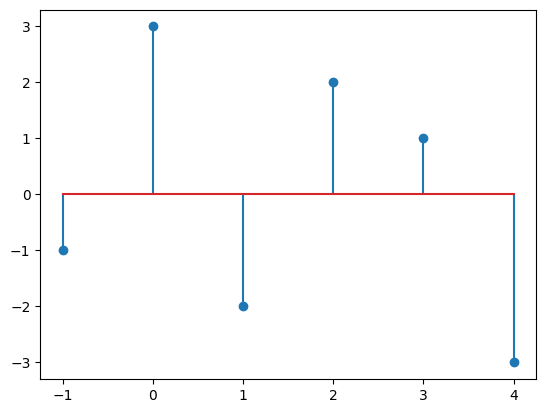

2
[1. 2.] [1 3]


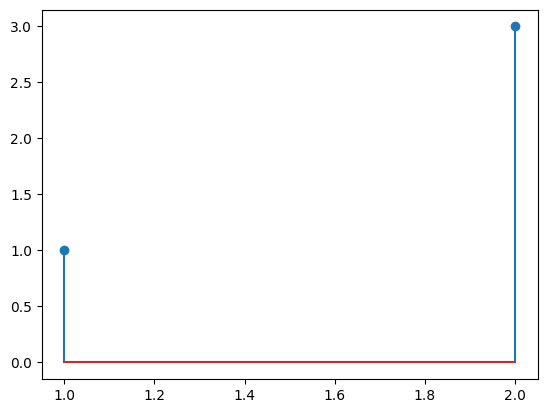

3
[-3.  0.  3.] [ 1 -2 -1]


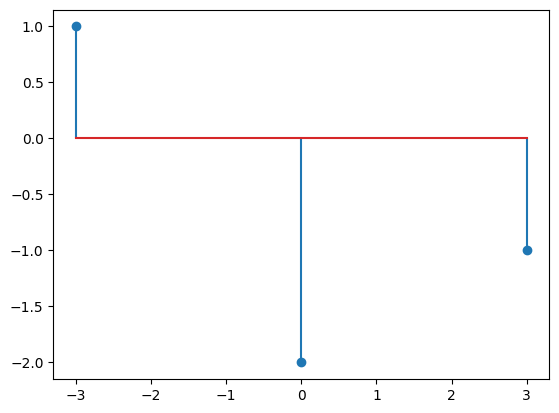

4
[-20 -16 -12  -8  -4   0] [-1  3 -2  2  1 -3]


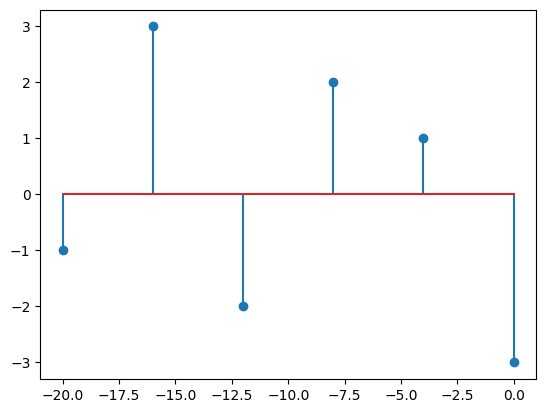

5
[-1.  0.  1.] [ 1  2 -2]


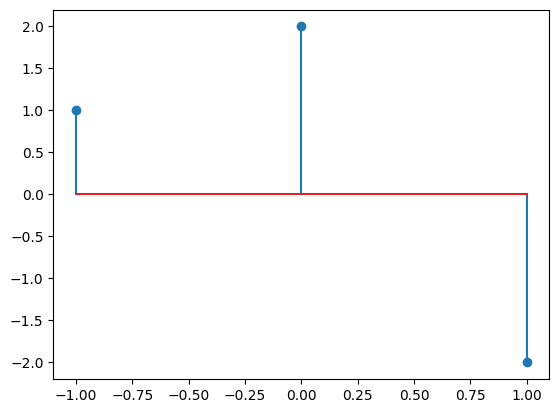

6
[-1.  0.  1.  2.  3.  4.] [-1  3 -1  5  1 -3]


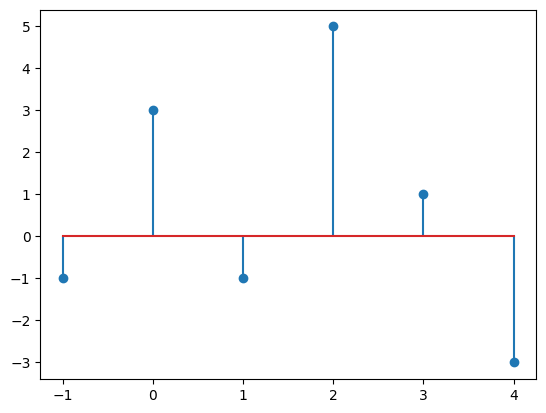

In [37]:
t=np.arange(-2,4)
t_1,x_1=x1(t,x_t)
t_1,x_1=filterInt(t_1,x_1)
display(t_1, x_1, 1)

t=np.arange(-2,4)
t_2,x_2=x2(t,x_t)
t_2,x_2=filterInt(t_2,x_2)
display(t_2, x_2, 2)

t=np.arange(-2,4)
t_3,x_3=x3(t,x_t)
t_3,x_3=filterInt(t_3,x_3)
display(t_3, x_3, 3)

t=np.arange(-2,4)
t_4,x_4=x4(t,x_t)
t_4,x_4=filterInt(t_4,x_4)
display(t_4, x_4, 4)

t=np.arange(-2,4)
t_5,x_5=x5(t,x_t)
t_5,x_5=filterInt(t_5,x_5)
display(t_5, x_5, 5)

t=np.arange(-2,4)
t_6,x_6=x6(t,x_t)
t_6,x_6=filterInt(t_6,x_6)
display(t_6, x_6, 6)

## Problem 5 (ยังไม่ได้ทำ)
Determine whether each of following signals is periodic, and if so, find its period.

1.$x[n] = \sin \left( \frac{\pi n}{4} + \frac{\pi}{8}\right)$

2.$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \sin\left( \frac{\pi}{3}n\right)$

3.$x[n] = \sin \left( \frac{3\pi n}{4}\right)\sin\left( \frac{\pi}{3}n\right)$

4.$x[n] = \exp \left( \frac{6\pi}{5}n \right)$

5.$x[n] = \exp \left( j\frac{5\pi}{6}n \right)$

6.$x[n] =  \sum_{m=-\infty}^{\infty} \left[ \delta[n-2m] + 2\delta[n-3m] \right]$

<!-- 1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \cos \left( \frac{\pi}{3} n \right)$ -->

 ## Problem 6 (ยังไม่ได้ทำ)

 [python] Signal transformations :
 Study the sawtooth function in the figure below. Apply reflection, scaling, shifting operations to the signal and plot the transformed signals compared with the original sawtooth signal.  


In [38]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))
# plt.show()

In [40]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# scaling factor = 3 and 1/3
## TODO : writing code for time scaling

In [41]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# shifting t to the left and right 0.05 units

## TODO : writing code for time shifting

In [42]:
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

## TODO : writing code for time Reflection


  ## Problem 7 (ยังไม่ได้ทำ)
 [python] Elementary signals: study  the ramp signal plotted in the example below. \\
TODO : plot these signals

1.   Unit step function
2.   Unit impulse function



In [43]:
# t = np.linspace(-1, 1, 500)
# ramp_t = t.copy()
# ramp_t[ramp_t < 0 ] = 0
# plt.plot(t, ramp_t)
# plt.show()

In [44]:
## TODO : writing code for plotting unit step function

In [45]:
## TODO : writing code for plotting unit impulse function

## Problem 8 (ยังไม่ได้ทำ)
Express the signal that shown in Figure below using Unit-ramp functions



<a href="https://ibb.co/pXt8t2Y"><img src="https://i.ibb.co/DKxyx40/Screen-Shot-2564-08-11-at-15-16-52.png" alt="Screen-Shot-2564-08-11-at-15-16-52" border="0"></a>



## Problem 9

Evaluate the following integrals

1. $\int_{-\infty}^{\infty} \left( \frac{2}{3}t-\frac{3}{2} \right) \delta(t-1) \,dt = -\frac{5}{6}$ 

1. $\int_{-\infty}^{\infty} (t-1) \delta \left(\frac{2}{3}t- \frac{3}{2} \right) \,dt = \frac{15}{8}$

1. $\int_{-3}^{-2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt = 0$

1. $\int_{-3}^{2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt = e^{-\frac{1}{2}}$

![alt text](IMG_2866.jpg)